In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [24]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCH = 50

In [25]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [26]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [27]:
len(dataset)
#each batch of images is 32

68

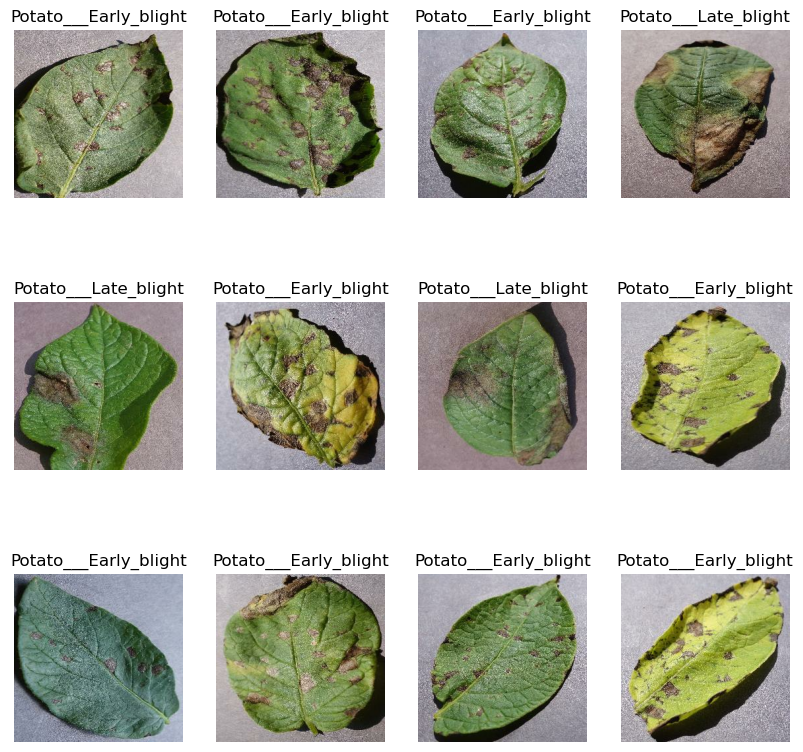

In [28]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        #print(label_batch.numpy())
        #32 batch, 256 by 256 images, RGB
    

In [7]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [29]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [30]:
train_ds = dataset.take(54)

In [31]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [32]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [33]:
val_ds = test_ds.take(6)

In [34]:
test_ds = test_ds.skip(6)

In [35]:
def partion_ds(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [36]:
train_ds, val_ds, test_ds = partion_ds(dataset)

In [37]:
len(train_ds)

54

In [38]:
len(val_ds)

6

In [39]:
len(test_ds)

8

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [41]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ]) 

In [42]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [87]:
n_classes = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [88]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [89]:
model.compile(
optimizer='adam',
loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [90]:
EPOCHS = 50

In [91]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 188s 3s/step - loss: 0.8996 - accuracy: 0.5104 - val_loss: 0.8733 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 123s 2s/step - loss: 0.6478 - accuracy: 0.7500 - val_loss: 0.6486 - val_accuracy: 0.7552
Epoch 3/50
54/54 [==============================] - 132s 2s/step - loss: 0.4616 - accuracy: 0.8391 - val_loss: 0.4857 - val_accuracy: 0.7969
Epoch 4/50
54/54 [==============================] - 135s 2s/step - loss: 0.3990 - accuracy: 0.8582 - val_loss: 0.4687 - val_accuracy: 0.8021
Epoch 5/50
54/54 [==============================] - 147s 3s/step - loss: 0.3293 - accuracy: 0.8872 - val_loss: 0.4651 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 134s 2s/step - loss: 0.2933 - accuracy: 0.8883 - val_loss: 0.4662 - val_accuracy: 0.8021
Epoch 7/50
54/54 [==============================] - 126s 2s/step - loss: 0.2512 - accuracy: 0.9045 - val_loss: 0.4456 - val_accuracy: 0.8281
Epoch 8/50
54

In [92]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 1s/step - loss: 0.0917 - accuracy: 0.9609


In [93]:
scores

[0.09165079146623611, 0.9609375]

In [94]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [95]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation')

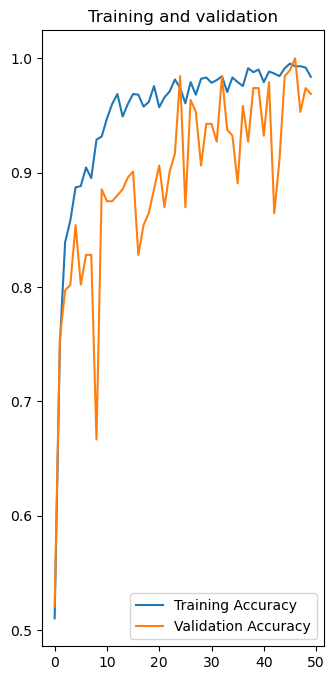

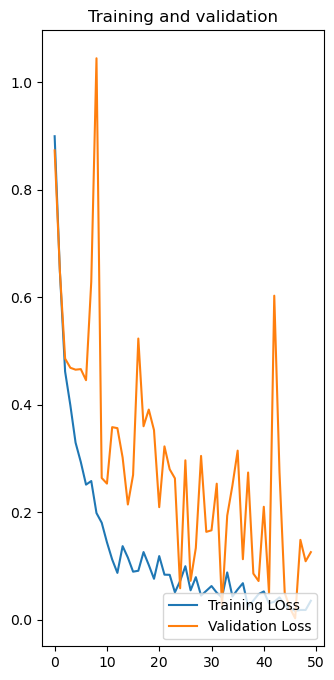

In [97]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training LOss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and validation')

first name to predict
actual lable: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
predicted lable Potato___Early_blight


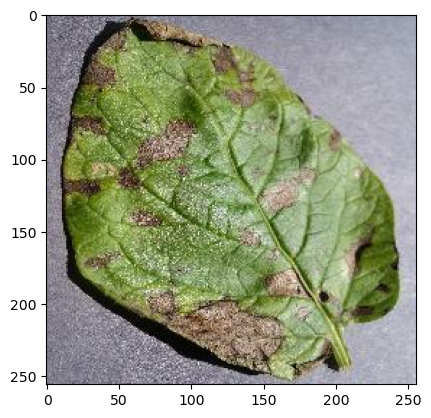

In [98]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first name to predict")
    plt.imshow(first_image)
    print("actual lable:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted lable", class_names[np.argmax(batch_prediction[0])])

In [99]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 91ms/step


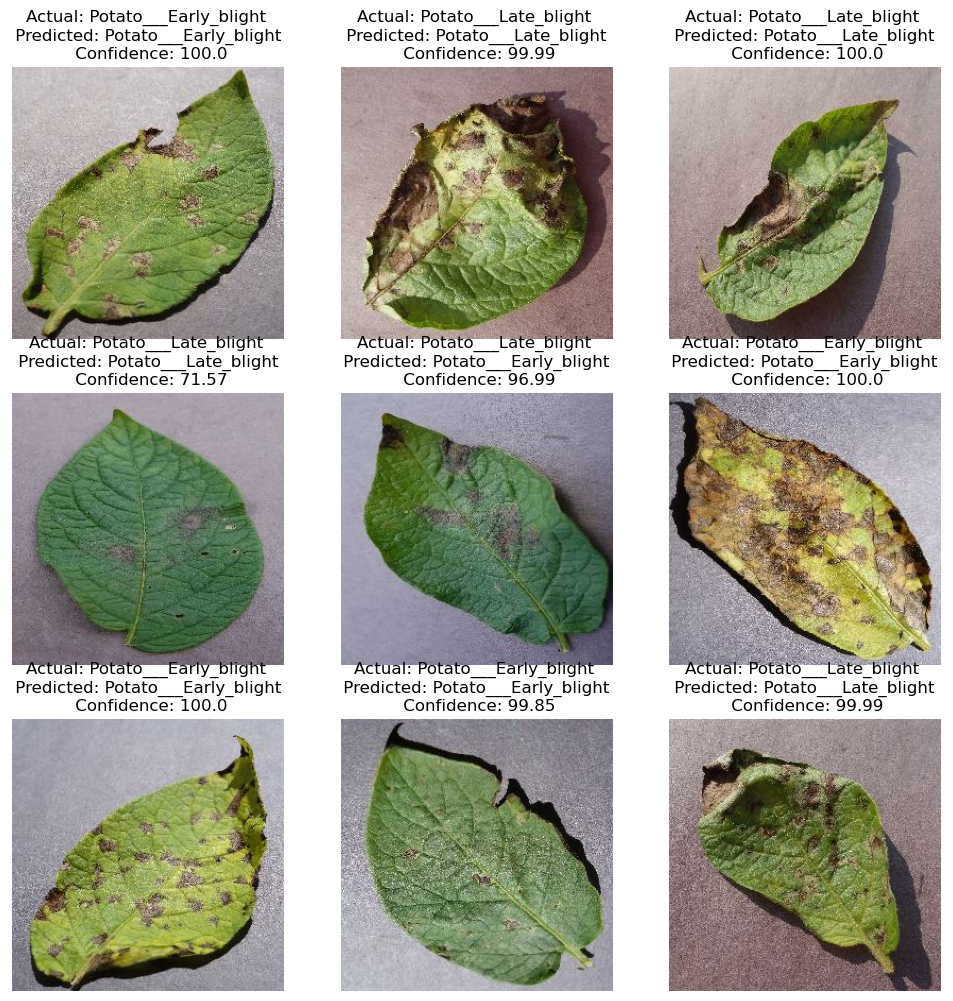

In [100]:
plt.figure(figsize=(12,12))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax =plt.subplot(3,3, i +1 )
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}")
        
        plt.axis("off")
        

In [101]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]]) + 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
